___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Uncomment the following lines if you want to suppress warnings:
# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

# Set it to None to display all rows in the dataframe:
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe:
pd.set_option("display.max_columns", None)

In [10]:
# Check python version
!python --version

Python 3.10.12


In [11]:
# Check tensorflow version
import tensorflow as tf

tf.__version__

'2.12.0'

In [12]:
# List cuda-capable gpu's that are attached to this session
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session")
else:
    print("CPU will be used for this session")

GPU support is enabled for this session


In [13]:
# Get more information about the GPU
if tf.config.list_physical_devices("GPU"):
    !nvidia-smi

Sat Aug  5 09:38:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [14]:
# If importing data from google drive, import drive from google.colab and mount your drive to the session
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Make sure the provide the correct path if drive is mounted
df = pd.read_csv("drive/MyDrive/Colab Notebooks/data/Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [16]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.000              1          1               1   
1       1  83807.860              1          0               1   
2       8 159660.800              3          1               0   
3       1      0.000              2          0               0   
4       2 125510.820              1          1               1   

   EstimatedSalary  Exited  
0       101348.880       1  
1       112542.580       0  
2       113931.570       1  
3        93826.630       0  
4        79084.100       0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [18]:
df.describe().T

count         mean       std          min          25%  \
RowNumber       10000.000     5000.500  2886.896        1.000     2500.750   
CustomerId      10000.000 15690940.569 71936.186 15565701.000 15628528.250   
CreditScore     10000.000      650.529    96.653      350.000      584.000   
Age             10000.000       38.922    10.488       18.000       32.000   
Tenure          10000.000        5.013     2.892        0.000        3.000   
Balance         10000.000    76485.889 62397.405        0.000        0.000   
NumOfProducts   10000.000        1.530     0.582        1.000        1.000   
HasCrCard       10000.000        0.706     0.456        0.000        0.000   
IsActiveMember  10000.000        0.515     0.500        0.000        0.000   
EstimatedSalary 10000.000   100090.240 57510.493       11.580    51002.110   
Exited          10000.000        0.204     0.403        0.000        0.000   

                         50%          75%          max  
RowNumber           5000.500     7500.250    10000.000  
CustomerId      15690738.000 15753233.750 15815690.000  
CreditScore          652.000      718.000      850.000  
Age                   37.000       44.000       92.000  
Tenure                 5.000        7.000       10.000  
Balance            97198.540   127644.240   250898.090  
NumOfProducts          1.000        2.000        4.000  
HasCrCard              1.000        1.000        1.000  
IsActiveMember         1.000        1.000        1.000  
EstimatedSalary   100193.915   149388.247   199992.480  
Exited                 0.000        0.000        1.000

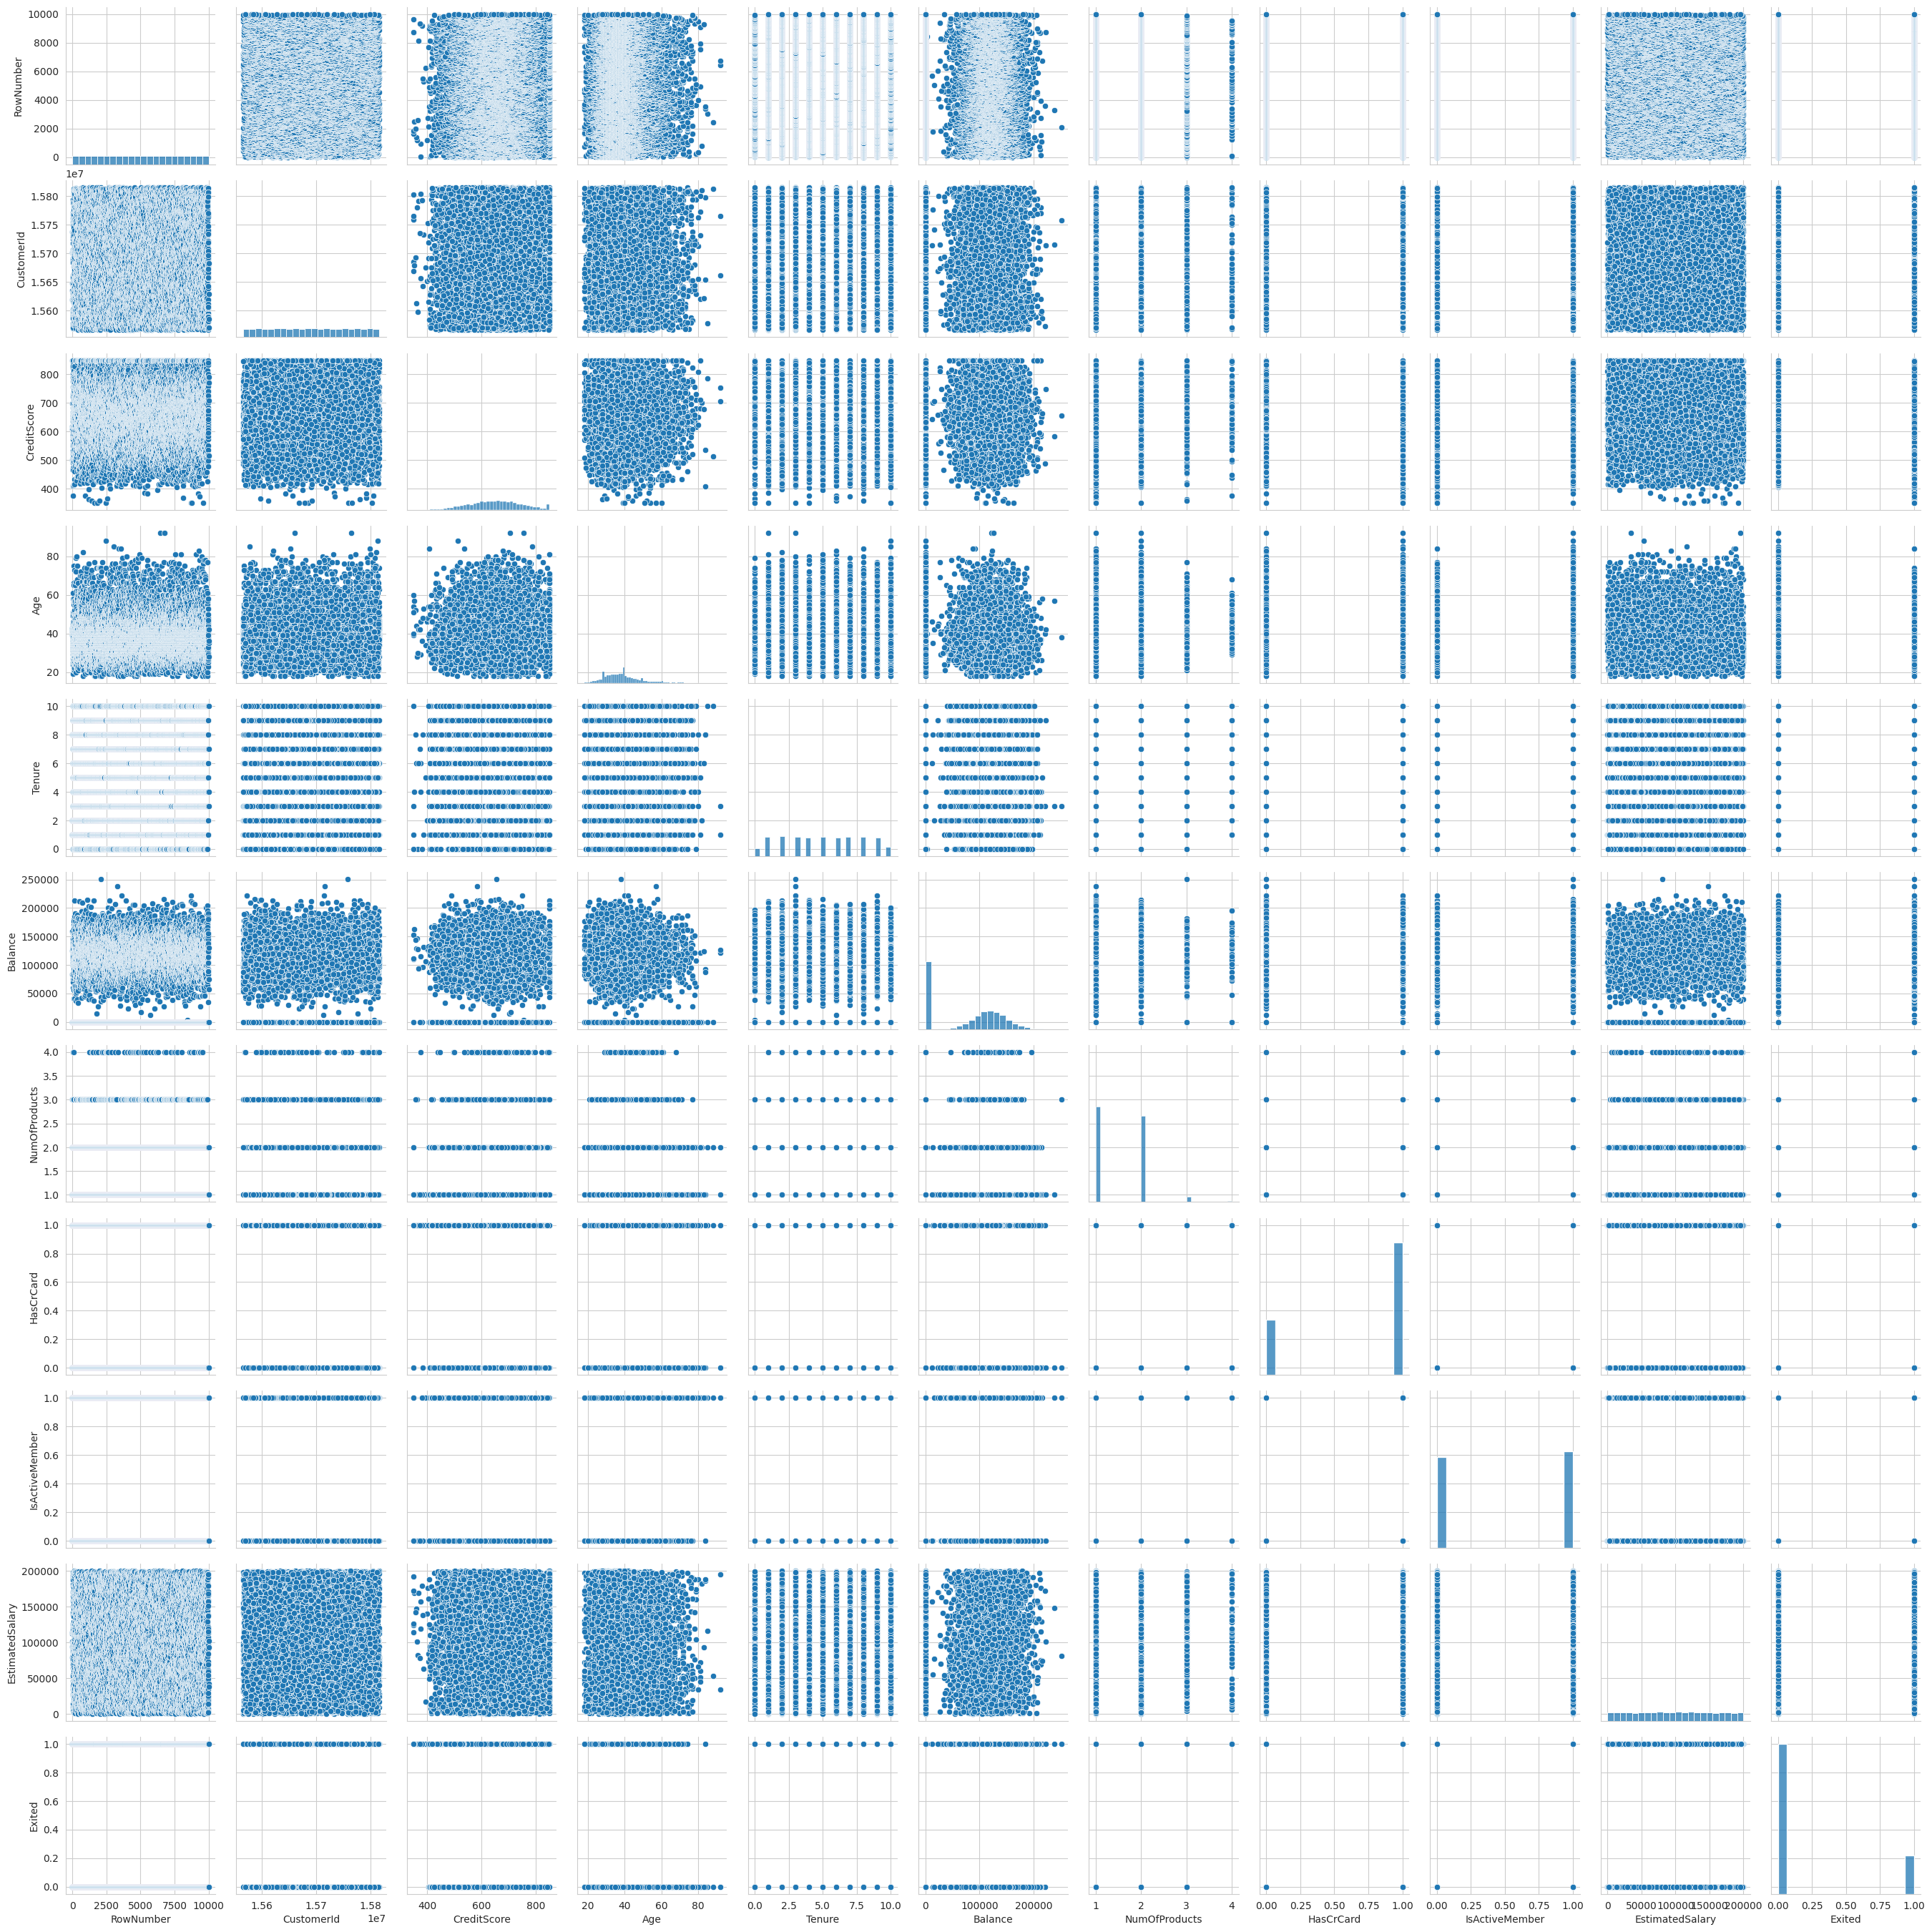

In [19]:
sns.pairplot(df)
plt.show()

In [20]:
df.corr()

<ipython-input-20-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


RowNumber  CustomerId  CreditScore    Age  Tenure  Balance  \
RowNumber            1.000       0.004        0.006  0.001  -0.006   -0.009   
CustomerId           0.004       1.000        0.005  0.009  -0.015   -0.012   
CreditScore          0.006       0.005        1.000 -0.004   0.001    0.006   
Age                  0.001       0.009       -0.004  1.000  -0.010    0.028   
Tenure              -0.006      -0.015        0.001 -0.010   1.000   -0.012   
Balance             -0.009      -0.012        0.006  0.028  -0.012    1.000   
NumOfProducts        0.007       0.017        0.012 -0.031   0.013   -0.304   
HasCrCard            0.001      -0.014       -0.005 -0.012   0.023   -0.015   
IsActiveMember       0.012       0.002        0.026  0.085  -0.028   -0.010   
EstimatedSalary     -0.006       0.015       -0.001 -0.007   0.008    0.013   
Exited              -0.017      -0.006       -0.027  0.285  -0.014    0.119   

                 NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
RowNumber                0.007      0.001           0.012           -0.006   
CustomerId               0.017     -0.014           0.002            0.015   
CreditScore              0.012     -0.005           0.026           -0.001   
Age                     -0.031     -0.012           0.085           -0.007   
Tenure                   0.013      0.023          -0.028            0.008   
Balance                 -0.304     -0.015          -0.010            0.013   
NumOfProducts            1.000      0.003           0.010            0.014   
HasCrCard                0.003      1.000          -0.012           -0.010   
IsActiveMember           0.010     -0.012           1.000           -0.011   
EstimatedSalary          0.014     -0.010          -0.011            1.000   
Exited                  -0.048     -0.007          -0.156            0.012   

                 Exited  
RowNumber        -0.017  
CustomerId       -0.006  
CreditScore      -0.027  
Age               0.285  
Tenure           -0.014  
Balance           0.119  
NumOfProducts    -0.048  
HasCrCard        -0.007  
IsActiveMember   -0.156  
EstimatedSalary   0.012  
Exited            1.000

<ipython-input-21-0be58aa5bbdd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


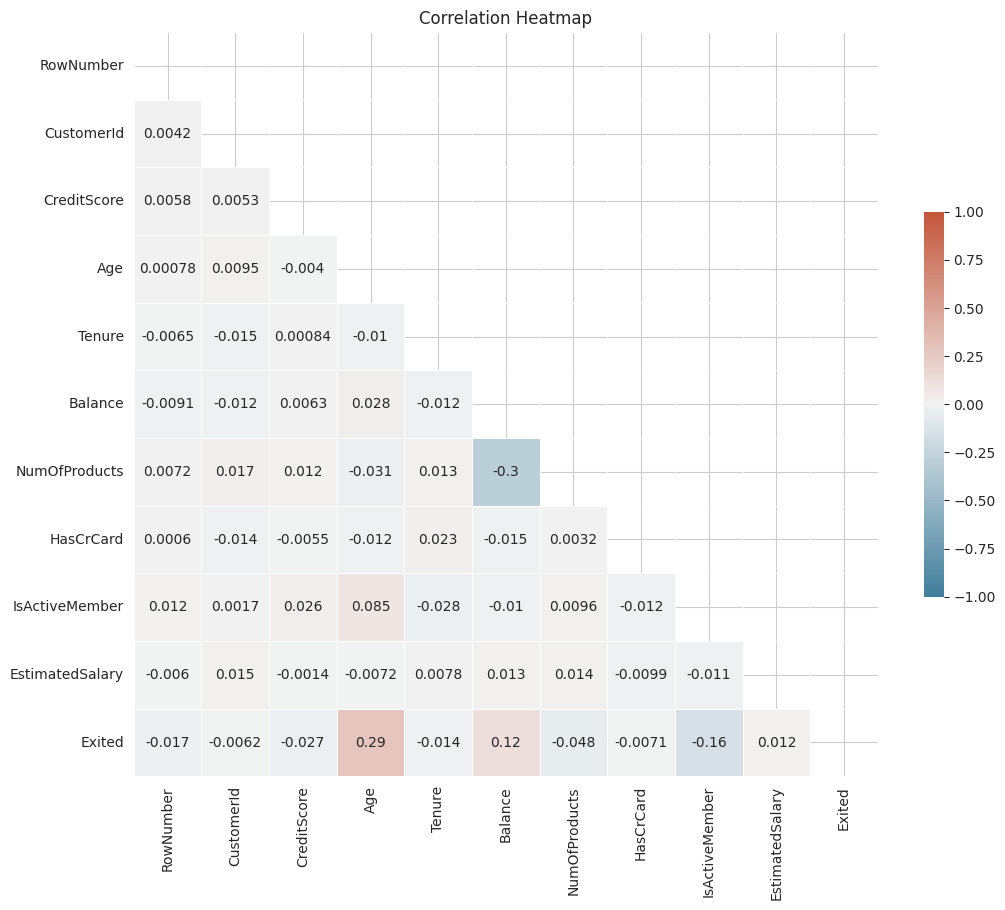

In [21]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title("Correlation Heatmap")
plt.show()

In [22]:
# Notably, the 'Exited' variable (our target for churn prediction) doesn't seem to have a strong correlation with any other specific variables. However, it has a slight positive correlation with 'Age' and 'Balance', and a slight negative correlation with 'IsActiveMember', 'NumOfProducts', and 'CreditScore'. This suggests that older customers with a higher balance are more likely to churn, whereas active members with multiple products and a high credit score are less likely to churn.

# Preprocessing of Data
- Train | Test Split, Scalling

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Define the features and the target
X = df.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)  # Exclude non-relevant columns
y = df['Exited']

In [25]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

In [26]:
X

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2      0.000              1   
1             608     Spain  Female   41       1  83807.860              1   
2             502    France  Female   42       8 159660.800              3   
3             699    France  Female   39       1      0.000              2   
4             850     Spain  Female   43       2 125510.820              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5      0.000              2   
9996          516    France    Male   35      10  57369.610              1   
9997          709    France  Female   36       7      0.000              1   
9998          772   Germany    Male   42       3  75075.310              2   
9999          792    France  Female   28       4 130142.790              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0             1               1       101348.880  
1             0               1       112542.580  
2             1               0       113931.570  
3             0               0        93826.630  
4             1               1        79084.100  
...         ...             ...              ...  
9995          1               0        96270.640  
9996          1               1       101699.770  
9997          0               1        42085.580  
9998          1               0        92888.520  
9999          1               0        38190.780  

[10000 rows x 10 columns]

In [27]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [28]:
X_train.shape

(8000, 10)

In [29]:
X_test.shape

(2000, 10)

In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [31]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bo

In [32]:
help(StandardScaler)

Help on class StandardScaler in module sklearn.preprocessing._data:

class StandardScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  StandardScaler(*, copy=True, with_mean=True, with_std=True)
 |  
 |  Standardize features by removing the mean and scaling to unit variance.
 |  
 |  The standard score of a sample `x` is calculated as:
 |  
 |      z = (x - u) / s
 |  
 |  where `u` is the mean of the training samples or zero if `with_mean=False`,
 |  and `s` is the standard deviation of the training samples or one if
 |  `with_std=False`.
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using
 |  :meth:`transform`.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual feat

In [33]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define which columns should be encoded vs scaled
columns_to_encode = ['Geography', 'Gender']
columns_to_scale  = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Instantiate encoder/scaler
scaler = StandardScaler()
ohe    = OneHotEncoder(drop='first')

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', scaler, columns_to_scale),
        ('encode', ohe, columns_to_encode)])

# Fit the preprocessor and transform the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

X_train.shape, X_test.shape


((8000, 11), (2000, 11))

In [34]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ...,  0.        ,
         0.        ,  1.        ],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.        ,
         0.        ,  1.        ],
       [-0.96147213, -1.41636539, -0.69539349, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.15932282,  0.3900109 ,  1.03972843, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.        ,
         0.        ,  1.        ]])

In [35]:
X_test

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.        ,
         0.        ,  1.        ],
       [-0.29729735,  0.3900109 , -1.38944225, ...,  0.        ,
         0.        ,  1.        ],
       [-0.52560743,  0.48508334, -0.3483691 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.41876609, -0.94100321, -0.3483691 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.        ,
         0.        ,  1.        ]])

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [36]:
import tensorflow as tf

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation

In [38]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Se

In [39]:
X_train.shape

(8000, 11)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
# Instantiate the model
logreg = LogisticRegression(random_state=42)

In [42]:
# Train the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

Confusion Matrix:
 [[1543   64]
 [ 314   79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



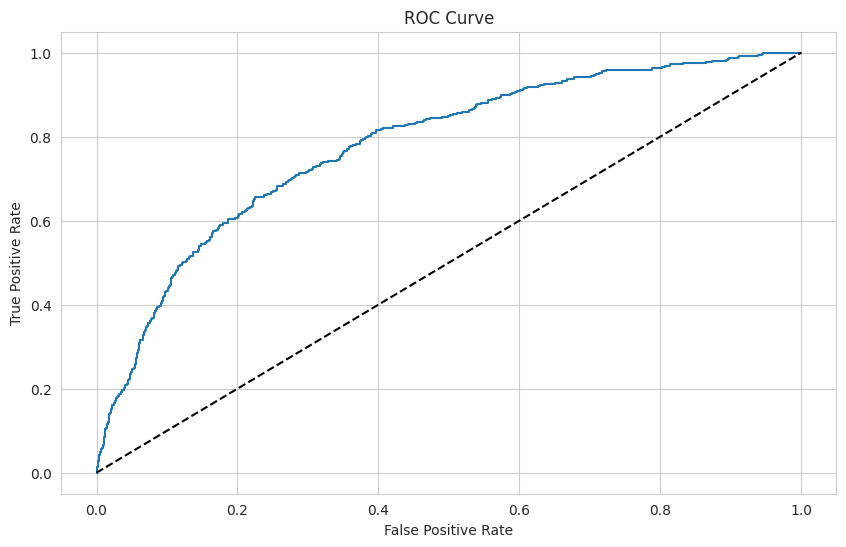

AUC Score:  0.7789093834068824


In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score

# Assume 'model' is your trained model, 'X_test' is your test features, and 'y_test' is your test labels.

# 1. If the model has a history attribute (like models trained with Keras), we can plot the change in metrics over epochs:
if hasattr(logreg, 'history'):
    plt.figure(figsize=(12, 4))
    plt.plot(model.history.history['loss'], label='Train Loss')
    plt.plot(model.history.history['val_loss'], label='Test Loss')
    plt.title('Loss over epochs')
    plt.legend()
    plt.show()

# 2. Make predictions and print the confusion matrix and classification report:
y_pred = logreg.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 3. Plot ROC curve and calculate AUC:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]  # get the probability of the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')  # dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC Score: ", auc_score)


## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [44]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense

In [45]:
# Define the model architecture
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

In [46]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define class weights
class_weights = {0: 1.,  # Class 0
                 1: 50.}  # Class 1 (assuming class 1 is the minority class)

# Fit the model
model.fit(X_train, y_train, epochs=10, class_weight=class_weights)

Epoch 1/10
250/250 [==============================] - 7s 4ms/step - loss: 2.9706 - accuracy: 0.2094
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 2.3553 - accuracy: 0.2099
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 2.2550 - accuracy: 0.2451
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 2.1950 - accuracy: 0.2751
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 2.1630 - accuracy: 0.2994
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 2.1411 - accuracy: 0.3166
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 2.1250 - accuracy: 0.3251
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 2.1078 - accuracy: 0.3320
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 2.0923 - accuracy: 0.3399
Epoch 10/10
250/250 [==============================] - 1s 3ms/step - loss: 2.0853 - accuracy: 0.3380

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

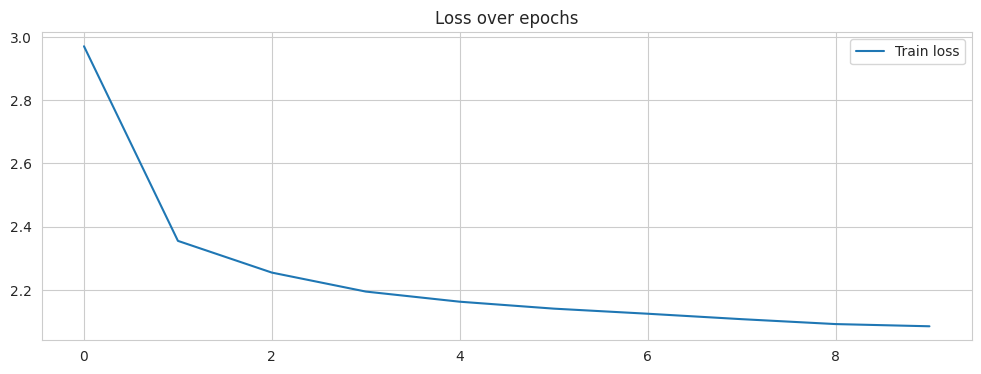

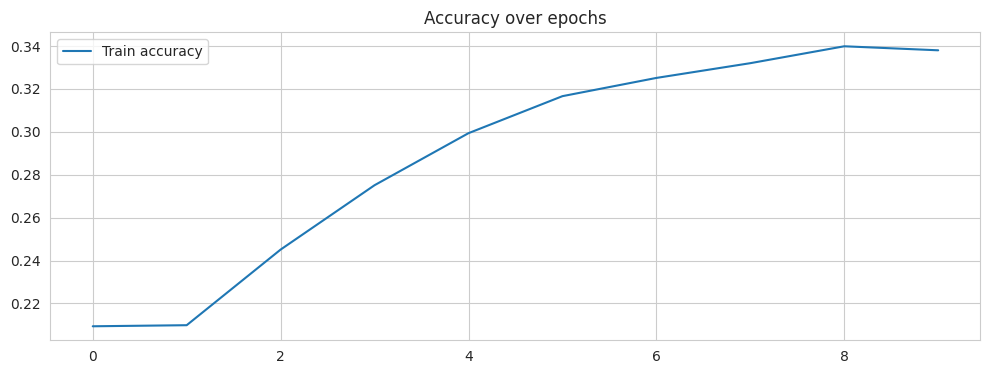

In [47]:
# Plot the training loss
plt.figure(figsize=(12, 4))
plt.plot(model.history.history['loss'], label='Train loss')
plt.title('Loss over epochs')
plt.legend()
plt.show()

# If accuracy was calculated, it can be plotted in a similar way:
if 'accuracy' in model.history.history:
    plt.figure(figsize=(12, 4))
    plt.plot(model.history.history['accuracy'], label='Train accuracy')
    plt.title('Accuracy over epochs')
    plt.legend()
    plt.show()




In [49]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate class probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities into class labels
y_pred = (y_pred_prob > 0.5).astype(int).ravel()

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


63/63 [==============================] - 0s 1ms/step
Confusion Matrix:
 [[ 253 1354]
 [   3  390]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.16      0.27      1607
           1       0.22      0.99      0.36       393

    accuracy                           0.32      2000
   macro avg       0.61      0.57      0.32      2000
weighted avg       0.84      0.32      0.29      2000



AUC:  0.8439373858959925


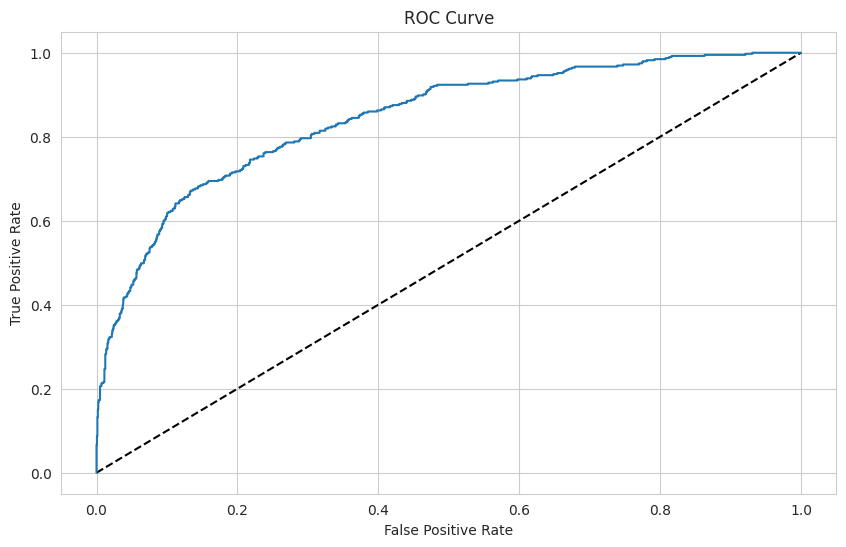

In [64]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute and print AUC score
print("AUC: ", roc_auc_score(y_test, y_pred_prob))

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [55]:
def eval_metric(actual, pred):
    """Prints regression metrics, calculated using the given
    actual and predicted target values.
    Args:
        actual (list): Actual target values.
        pred (list): Predicted target values.
    Returns:
        None
    """
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [58]:
eval_metric(y_test, y_pred)

r2_score: -3.29735682470616 
mae: 0.6785 
mse: 0.6785 
rmse: 0.8237111144084436


## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [61]:
def eval_metric(actual, pred):
    """Prints regression metrics, calculated using the given
    actual and predicted target values.
    Args:
        actual (list): Actual target values.
        pred (list): Predicted target values.
    Returns:
        None
    """
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [62]:
X_train.shape

(8000, 11)

In [65]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))
# model.add(Activation("relu"))
# Activation function can be added separately
# as a different line after each layer.
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(2, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                192       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 4)                 36        
                                                                 
 dense_7 (Dense)             (None, 2)                 10        
                                                                 
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
Total params: 649
Trainable params: 649
Non-trainable 

In [67]:
model.weights

[<tf.Variable 'dense_3/kernel:0' shape=(11, 16) dtype=float32, numpy=
 array([[ 0.31168   , -0.09924695,  0.35681525,  0.46341875,  0.1264638 ,
          0.10388288,  0.45944706,  0.01135525, -0.17138651, -0.36568853,
          0.27723143, -0.34336507,  0.45402405,  0.17836341,  0.2873179 ,
         -0.11241195],
        [ 0.21082911,  0.35820463,  0.09295282, -0.15564549, -0.01935518,
          0.32712606, -0.267484  , -0.1292057 , -0.03732648, -0.3244488 ,
         -0.20220315, -0.2662232 ,  0.4695033 ,  0.4710116 ,  0.26368698,
         -0.34296632],
        [-0.01772428, -0.23574924, -0.14030045, -0.45056814, -0.00648826,
          0.28053775,  0.2594923 , -0.12295181, -0.39209777, -0.1410327 ,
          0.21588323,  0.26803157,  0.17874375, -0.07651529, -0.2446502 ,
         -0.24868912],
        [-0.36073655, -0.41360444,  0.2752885 , -0.21015543,  0.11916128,
         -0.10642102, -0.46553117, -0.03077787, -0.05558607, -0.16217333,
         -0.02670783, -0.2125861 , -0.2750247 ,

In [68]:
model.fit(x=X_train, y=y_train, validation_split=0.2, batch_size=42, epochs=1000)

Epoch 1/1000
153/153 [==============================] - 4s 5ms/step - loss: 0.1938 - val_loss: 0.1692
Epoch 2/1000
153/153 [==============================] - 1s 4ms/step - loss: 0.1678 - val_loss: 0.1616
Epoch 3/1000
153/153 [==============================] - 1s 5ms/step - loss: 0.1633 - val_loss: 0.1581
Epoch 4/1000
153/153 [==============================] - 1s 5ms/step - loss: 0.1600 - val_loss: 0.1536
Epoch 5/1000
153/153 [==============================] - 1s 5ms/step - loss: 0.1538 - val_loss: 0.1462
Epoch 6/1000
153/153 [==============================] - 1s 5ms/step - loss: 0.1463 - val_loss: 0.1426
Epoch 7/1000
153/153 [==============================] - 1s 4ms/step - loss: 0.1401 - val_loss: 0.1356
Epoch 8/1000
153/153 [==============================] - 1s 5ms/step - loss: 0.1348 - val_loss: 0.1316
Epoch 9/1000
153/153 [==============================] - 1s 6ms/step - loss: 0.1299 - val_loss: 0.1273
Epoch 10/1000
153/153 [==============================] - 1s 7ms/step - loss: 0.126

In [69]:
model.weights

[<tf.Variable 'dense_3/kernel:0' shape=(11, 16) dtype=float32, numpy=
 array([[ 0.744453  , -0.20026705,  0.47524995,  0.3187421 ,  0.11667047,
         -0.01445191,  0.6281093 ,  0.07957768, -0.09156898, -0.61782557,
          0.4894319 , -0.49100867,  0.5214839 ,  0.05083565,  0.4327064 ,
          0.00412624],
        [ 0.18173651,  0.9092545 , -0.12955648, -0.769178  ,  0.02904832,
          0.34555948, -0.37197405, -0.4187464 ,  0.05992342, -0.2025242 ,
         -0.0719059 ,  0.24723823,  0.9953102 ,  0.7658882 ,  1.3540728 ,
         -1.0245576 ],
        [-0.0609793 ,  0.03144605,  0.04059726, -0.42542174,  0.1234881 ,
          0.51405543,  0.19605796, -0.1278286 , -0.66200167, -0.4440932 ,
         -0.09278313,  0.6401106 ,  0.2745444 ,  0.35522264, -0.39251202,
         -0.17422892],
        [-0.63126236, -0.23115131,  0.59386235, -0.6576435 , -0.14702305,
         -0.31307653, -0.7601319 ,  0.06292427,  0.48939407, -0.09421588,
         -0.26087716,  0.11611247, -0.12699158,

In [70]:
pd.DataFrame(model.history.history)

loss  val_loss
0   0.194     0.169
1   0.168     0.162
2   0.163     0.158
3   0.160     0.154
4   0.154     0.146
..    ...       ...
995 0.069     0.134
996 0.070     0.138
997 0.073     0.130
998 0.073     0.136
999 0.070     0.134

[1000 rows x 2 columns]

<Axes: >

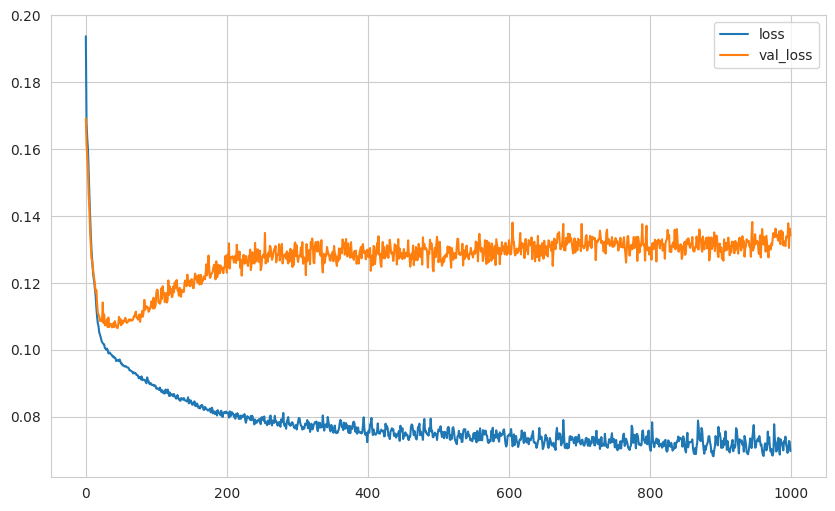

In [71]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [72]:
model.evaluate(X_test, y_test, verbose=0)

0.13403566181659698

In [73]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 3ms/step


In [74]:
eval_metric(y_test, y_pred)

r2_score: 0.15107021181830638 
mae: 0.21284937347471714 
mse: 0.13403561416398418 
rmse: 0.36610874636367835


0.003 Learning Rate adjustment

In [75]:
from tensorflow.keras.optimizers import Adam

In [76]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))
# model.add(Activation("relu"))
# Activation function can be added separately
# as a different line after each layer.
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(2, activation="relu"))
model.add(Dense(1))

opt = Adam(learning_rate=0.003)  # default learning rate value is 0.001
model.compile(optimizer="adam", loss="mse")

In [77]:
model.weights

[<tf.Variable 'dense_9/kernel:0' shape=(11, 16) dtype=float32, numpy=
 array([[ 0.46070138,  0.41149136,  0.19081679, -0.3609918 ,  0.16669878,
         -0.35407263, -0.3968944 , -0.22036293, -0.12414011,  0.06334123,
         -0.04590589,  0.21654019, -0.3810066 ,  0.12015405, -0.27593756,
          0.05247936],
        [ 0.46659216,  0.41870233, -0.22650133, -0.41594443, -0.07357153,
         -0.11440274, -0.44883314, -0.3915901 ,  0.11365399,  0.15616813,
         -0.23496419,  0.3651776 ,  0.44126347, -0.37680665,  0.18955132,
         -0.04424542],
        [-0.01396433,  0.28403404, -0.46474543, -0.15798056,  0.31391886,
          0.359274  , -0.39135337, -0.09710667, -0.20689866, -0.43443015,
          0.21341029,  0.03360936,  0.37771097, -0.41241792, -0.34141576,
          0.0195885 ],
        [-0.1397269 ,  0.18809184, -0.17186034,  0.2675744 ,  0.05310187,
         -0.23963395,  0.430837  ,  0.311712  , -0.36380363,  0.35970876,
          0.19391313, -0.203652  ,  0.00576916,

In [78]:
model.fit(x=X_train, y=y_train, validation_split=0.2, batch_size=42, epochs=1000)

Epoch 1/1000
153/153 [==============================] - 3s 5ms/step - loss: 0.1974 - val_loss: 0.1596
Epoch 2/1000
153/153 [==============================] - 1s 5ms/step - loss: 0.1539 - val_loss: 0.1386
Epoch 3/1000
153/153 [==============================] - 1s 4ms/step - loss: 0.1399 - val_loss: 0.1306
Epoch 4/1000
153/153 [==============================] - 1s 6ms/step - loss: 0.1293 - val_loss: 0.1221
Epoch 5/1000
153/153 [==============================] - 1s 6ms/step - loss: 0.1217 - val_loss: 0.1183
Epoch 6/1000
153/153 [==============================] - 1s 6ms/step - loss: 0.1168 - val_loss: 0.1151
Epoch 7/1000
153/153 [==============================] - 1s 6ms/step - loss: 0.1129 - val_loss: 0.1130
Epoch 8/1000
153/153 [==============================] - 1s 5ms/step - loss: 0.1103 - val_loss: 0.1124
Epoch 9/1000
153/153 [==============================] - 1s 5ms/step - loss: 0.1082 - val_loss: 0.1120
Epoch 10/1000
153/153 [==============================] - 1s 4ms/step - loss: 0.106

<Axes: >

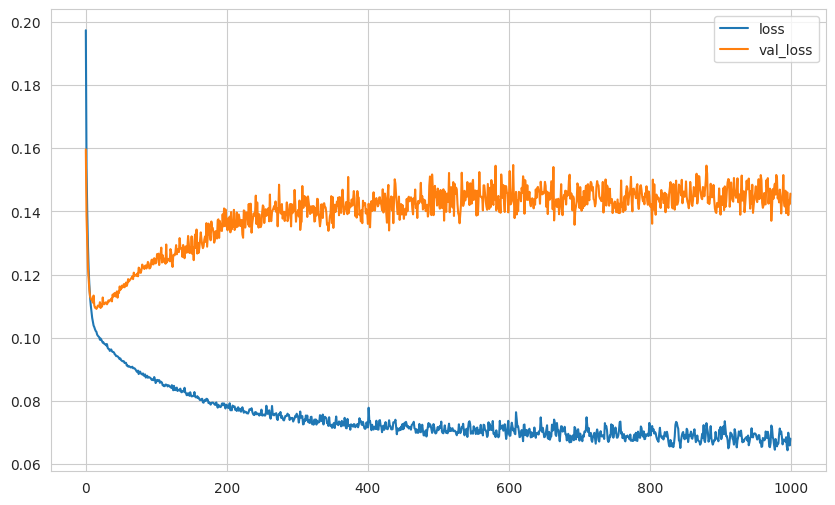

In [79]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [80]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [81]:
eval_metric(y_test, y_pred)

r2_score: 0.12796697357120823 
mae: 0.2123437517248094 
mse: 0.13768333246853245 
rmse: 0.3710570474583827


0.010 Learning Rate adjustment (0.001 is the default)


In [82]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))
# model.add(Activation("relu"))
# Activation function can be added separately
# as a different line after each layer.
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(2, activation="relu"))
model.add(Dense(1))

opt = Adam(learning_rate=0.010)  # default learning rate value is 0.001
model.compile(optimizer="adam", loss="mse")

In [83]:
model.weights

[<tf.Variable 'dense_15/kernel:0' shape=(11, 16) dtype=float32, numpy=
 array([[-1.7178392e-01, -1.7589813e-01, -1.5073478e-01, -3.7554651e-01,
         -3.3943859e-01,  3.6647192e-01,  4.0068582e-01,  2.1783343e-01,
         -4.6397904e-01, -4.2207709e-01,  3.2199100e-01,  3.1180730e-01,
          2.9854885e-01,  4.5747462e-01,  3.8286433e-01, -3.8808301e-01],
        [ 2.1450230e-01, -1.6340739e-01, -2.8007299e-01,  1.9256309e-01,
          3.7838128e-01, -4.4765696e-01, -1.6600844e-01,  1.7151058e-02,
          9.9013716e-02, -3.7560254e-02,  3.5100707e-01,  1.3186994e-01,
          2.1265504e-01,  4.7003427e-01, -4.2888868e-01, -4.0992385e-01],
        [-1.0778016e-01, -4.2572689e-01, -1.1494255e-01,  2.0626464e-01,
         -3.7933457e-01,  2.1508774e-01, -4.1413179e-01, -4.4767910e-01,
         -3.2439846e-01, -4.0725678e-01, -1.5914154e-01, -2.3880146e-01,
         -1.9470462e-01,  8.5408539e-02,  2.8527468e-02,  2.6282766e-01],
        [ 2.6444048e-02,  1.1601791e-01, -4.255565

In [84]:
model.fit(x=X_train, y=y_train, validation_split=0.2, batch_size=42, epochs=1000)

Epoch 1/1000
153/153 [==============================] - 4s 11ms/step - loss: 0.1760 - val_loss: 0.1512
Epoch 2/1000
153/153 [==============================] - 1s 5ms/step - loss: 0.1467 - val_loss: 0.1315
Epoch 3/1000
153/153 [==============================] - 1s 5ms/step - loss: 0.1271 - val_loss: 0.1204
Epoch 4/1000
153/153 [==============================] - 1s 6ms/step - loss: 0.1165 - val_loss: 0.1156
Epoch 5/1000
153/153 [==============================] - 1s 6ms/step - loss: 0.1124 - val_loss: 0.1139
Epoch 6/1000
153/153 [==============================] - 1s 6ms/step - loss: 0.1105 - val_loss: 0.1111
Epoch 7/1000
153/153 [==============================] - 1s 5ms/step - loss: 0.1089 - val_loss: 0.1098
Epoch 8/1000
153/153 [==============================] - 1s 4ms/step - loss: 0.1080 - val_loss: 0.1100
Epoch 9/1000
153/153 [==============================] - 1s 5ms/step - loss: 0.1069 - val_loss: 0.1094
Epoch 10/1000
153/153 [==============================] - 1s 4ms/step - loss: 0.10

<Axes: >

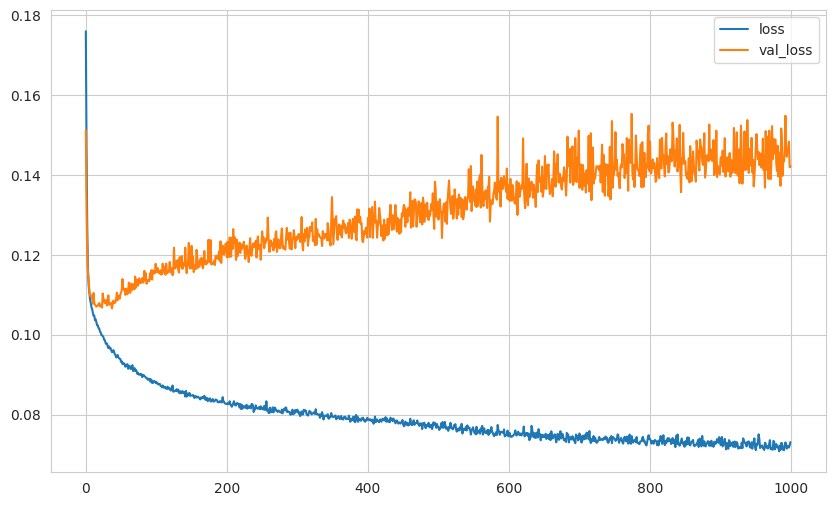

In [85]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [86]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [87]:
eval_metric(y_test, y_pred)

r2_score: 0.15824215225882077 
mae: 0.21487044242396952 
mse: 0.13290325262469735 
rmse: 0.3645589837388421


### Add Dropout Layer

In [109]:
from tensorflow.keras.layers import Dropout

In [114]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.1))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(4, activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(2, activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [115]:
model.fit(x=X_train, y=y_train, validation_split=0.2, batch_size=42, epochs=100, verbose=1)

Epoch 1/100
153/153 [==============================] - 3s 6ms/step - loss: 0.6591 - accuracy: 0.7484 - val_loss: 0.5431 - val_accuracy: 0.7987
Epoch 2/100
153/153 [==============================] - 1s 5ms/step - loss: 0.5324 - accuracy: 0.7920 - val_loss: 0.4602 - val_accuracy: 0.7987
Epoch 3/100
153/153 [==============================] - 1s 5ms/step - loss: 0.5017 - accuracy: 0.7917 - val_loss: 0.4383 - val_accuracy: 0.7987
Epoch 4/100
153/153 [==============================] - 1s 4ms/step - loss: 0.4859 - accuracy: 0.7930 - val_loss: 0.4300 - val_accuracy: 0.7987
Epoch 5/100
153/153 [==============================] - 1s 5ms/step - loss: 0.4757 - accuracy: 0.7948 - val_loss: 0.4200 - val_accuracy: 0.8000
Epoch 6/100
153/153 [==============================] - 1s 4ms/step - loss: 0.4653 - accuracy: 0.8012 - val_loss: 0.4144 - val_accuracy: 0.8119
Epoch 7/100
153/153 [==============================] - 1s 5ms/step - loss: 0.4468 - accuracy: 0.8047 - val_loss: 0.4024 - val_accuracy: 0.8144

<Axes: >

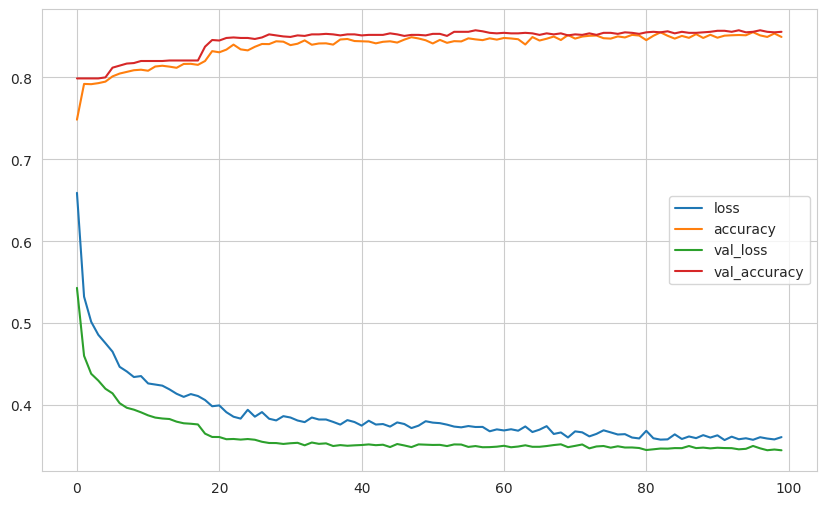

In [116]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [117]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.344401091337204
accuracy:  0.8619999885559082


In [118]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1560   47]
 [ 229  164]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.78      0.42      0.54       393

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [88]:
from tensorflow.keras.callbacks import EarlyStopping

In [97]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(2, activation="relu"))
model.add(Dense(1))

opt = Adam(learning_rate=0.010)  # default learning rate value is 0.001
model.compile(optimizer="adam", loss="mse")

In [98]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=25, restore_best_weights=True
)

In [99]:
model.fit(x=X_train, y=y_train, validation_split=0.2, batch_size=42, epochs=1000, callbacks=[early_stop])

Epoch 1/1000
153/153 [==============================] - 3s 6ms/step - loss: 0.1923 - val_loss: 0.1690
Epoch 2/1000
153/153 [==============================] - 1s 6ms/step - loss: 0.1678 - val_loss: 0.1614
Epoch 3/1000
153/153 [==============================] - 1s 6ms/step - loss: 0.1629 - val_loss: 0.1577
Epoch 4/1000
153/153 [==============================] - 1s 6ms/step - loss: 0.1571 - val_loss: 0.1515
Epoch 5/1000
153/153 [==============================] - 1s 5ms/step - loss: 0.1502 - val_loss: 0.1440
Epoch 6/1000
153/153 [==============================] - 1s 4ms/step - loss: 0.1425 - val_loss: 0.1371
Epoch 7/1000
153/153 [==============================] - 1s 5ms/step - loss: 0.1337 - val_loss: 0.1293
Epoch 8/1000
153/153 [==============================] - 1s 4ms/step - loss: 0.1257 - val_loss: 0.1237
Epoch 9/1000
153/153 [==============================] - 1s 4ms/step - loss: 0.1192 - val_loss: 0.1187
Epoch 10/1000
153/153 [==============================] - 1s 4ms/step - loss: 0.114

<Axes: >

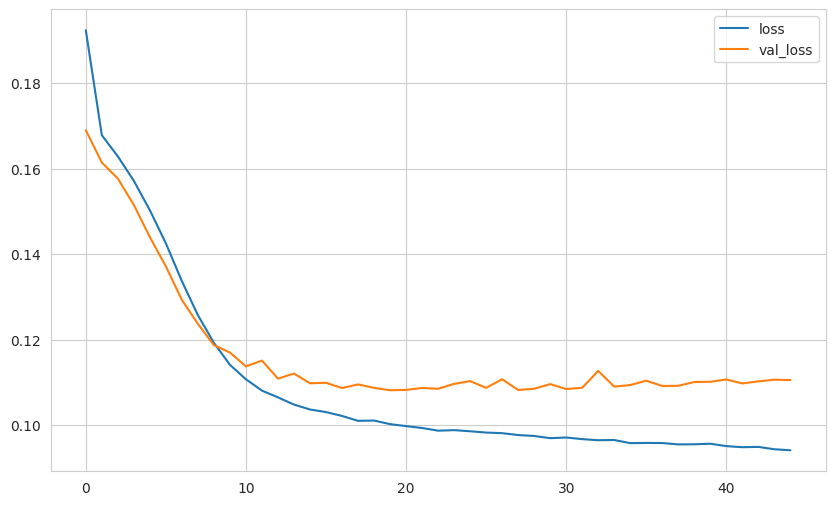

In [100]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [101]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [102]:
eval_metric(y_test, y_pred)

r2_score: 0.3246282807802099 
mae: 0.22223741039633751 
mse: 0.1066329211612444 
rmse: 0.32654696624106677


#### Monitor the "val_recall" as metric

In [105]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(2, activation="relu"))
model.add(Dense(1))

opt = Adam(learning_rate=0.010)  # default learning rate value is 0.001
model.compile(optimizer="adam", loss="mse", metrics=[tf.keras.metrics.Recall()])

In [106]:
early_stop = EarlyStopping(
    monitor="val_recall", mode="min", verbose=1, patience=25, restore_best_weights=True
)

In [107]:
model.fit(x=X_train, y=y_train, validation_split=0.2, batch_size=42, epochs=1000, callbacks=[early_stop])

Epoch 1/1000
153/153 [==============================] - 3s 6ms/step - loss: 0.1485 - recall: 0.0756 - val_loss: 0.1313 - val_recall: 0.1988
Epoch 2/1000
153/153 [==============================] - 1s 5ms/step - loss: 0.1276 - recall: 0.2738 - val_loss: 0.1200 - val_recall: 0.3106
Epoch 3/1000
153/153 [==============================] - 1s 5ms/step - loss: 0.1189 - recall: 0.3722 - val_loss: 0.1152 - val_recall: 0.3571
Epoch 4/1000
153/153 [==============================] - 1s 7ms/step - loss: 0.1148 - recall: 0.4062 - val_loss: 0.1135 - val_recall: 0.3665
Epoch 5/1000
153/153 [==============================] - 1s 7ms/step - loss: 0.1128 - recall: 0.4123 - val_loss: 0.1124 - val_recall: 0.3696
Epoch 6/1000
153/153 [==============================] - 1s 7ms/step - loss: 0.1113 - recall: 0.4221 - val_loss: 0.1110 - val_recall: 0.3447
Epoch 7/1000
153/153 [==============================] - 1s 5ms/step - loss: 0.1096 - recall: 0.4372 - val_loss: 0.1100 - val_recall: 0.3789
Epoch 8/1000
153/153

<Axes: >

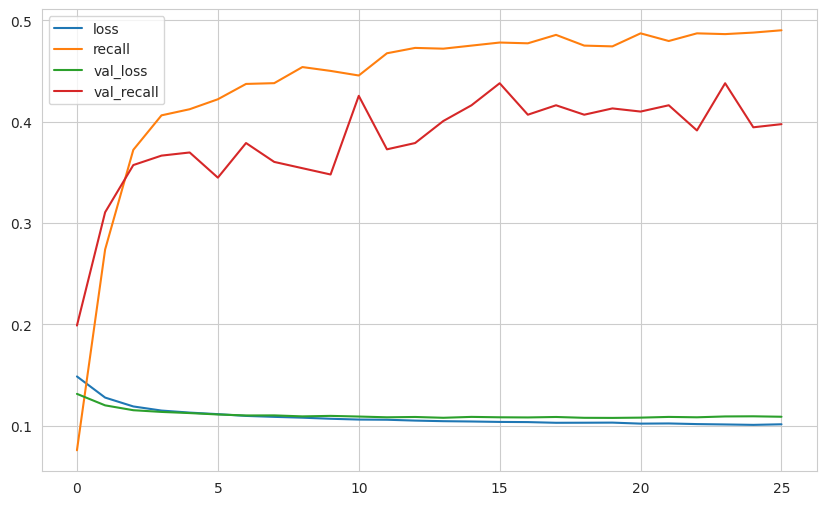

In [108]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

## Optuna

In [119]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.3/225.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.6 MB/s eta 0:00:00


In [120]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [124]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=10, restore_best_weights=True
)

In [125]:
trial_metric = "accuracy"
batch_size = 42


def create_model(trial):
    # Some hyperparameters we want to optimize
    input_layer_units = trial.suggest_int("input_layer_units", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(input_layer_units, input_dim=X_train.shape[1], activation="relu"))

    # you can add the hidden layers automatically, see the example below:
    hidden_layers = trial.suggest_int("hidden_layers", 2, 6)
    for i in range(hidden_layers):
      hidden_layer_units = "hidden_layer_units_" + str(i)
      hidden_layer_units = trial.suggest_int(hidden_layer_units, 8, 128)
      model.add(Dense(hidden_layer_units, activation="relu"))


    # we decided to use one neuron with sigmoid func in the output layer
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [126]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-08-05 13:05:24,710] A new study created in memory with name: no-name-acccf7c6-2060-4aa9-8bc6-6b226ed55c05
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.rmsprop.RMSprop'> which is of type type.
  warnings.warn

Restoring model weights from the end of the best epoch: 12.
Epoch 22: early stopping


[I 2023-08-05 13:05:47,294] Trial 0 finished with value: 0.859000027179718 and parameters: {'input_layer_units': 70, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.001955596592992127, 'hidden_layers': 5, 'hidden_layer_units_0': 74, 'hidden_layer_units_1': 82, 'hidden_layer_units_2': 22, 'hidden_layer_units_3': 47, 'hidden_layer_units_4': 19, 'w0': 0.1485782918707918, 'w1': 0.1483154957206464}. Best is trial 0 with value: 0.859000027179718.
[I 2023-08-05 13:07:23,929] Trial 1 finished with value: 0.8585000038146973 and parameters: {'input_layer_units': 78, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 1.3783309167974272e-05, 'hidden_layers': 6, 'hidden_layer_units_0': 45, 'hidden_layer_units_1': 117, 'hidden_layer_units_2': 61, 'hidden_layer_units_3': 51, 'hidden_layer_units_4': 55, 'hidden_layer_units_5': 24, 'w0': 1.080388016520461, 'w1': 0.5822616492692093}. Best is trial 0 with value: 0.859000027179718.
[I 2023-08-05 13:08:45,

Restoring model weights from the end of the best epoch: 21.
Epoch 31: early stopping


[I 2023-08-05 13:09:15,394] Trial 3 finished with value: 0.5009999871253967 and parameters: {'input_layer_units': 127, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0011118954896529132, 'hidden_layers': 5, 'hidden_layer_units_0': 71, 'hidden_layer_units_1': 65, 'hidden_layer_units_2': 10, 'hidden_layer_units_3': 44, 'hidden_layer_units_4': 44, 'w0': 0.021615012684796535, 'w1': 1.7999190028406915}. Best is trial 0 with value: 0.859000027179718.


Restoring model weights from the end of the best epoch: 22.
Epoch 32: early stopping


[I 2023-08-05 13:09:44,056] Trial 4 finished with value: 0.859499990940094 and parameters: {'input_layer_units': 80, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 8.576651262781339e-05, 'hidden_layers': 3, 'hidden_layer_units_0': 26, 'hidden_layer_units_1': 117, 'hidden_layer_units_2': 56, 'w0': 0.01371306177323904, 'w1': 0.010923573542247982}. Best is trial 4 with value: 0.859499990940094.


Restoring model weights from the end of the best epoch: 10.
Epoch 20: early stopping


[I 2023-08-05 13:10:05,632] Trial 5 finished with value: 0.8525000214576721 and parameters: {'input_layer_units': 88, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.006513652856991927, 'hidden_layers': 5, 'hidden_layer_units_0': 113, 'hidden_layer_units_1': 74, 'hidden_layer_units_2': 93, 'hidden_layer_units_3': 10, 'hidden_layer_units_4': 108, 'w0': 0.05259854018452111, 'w1': 0.011433719198526381}. Best is trial 4 with value: 0.859499990940094.


Restoring model weights from the end of the best epoch: 15.
Epoch 25: early stopping


[I 2023-08-05 13:10:36,175] Trial 6 finished with value: 0.862500011920929 and parameters: {'input_layer_units': 88, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 7.822070584213856e-05, 'hidden_layers': 5, 'hidden_layer_units_0': 126, 'hidden_layer_units_1': 87, 'hidden_layer_units_2': 34, 'hidden_layer_units_3': 96, 'hidden_layer_units_4': 52, 'w0': 1.9373186207807087, 'w1': 1.2236652210006091}. Best is trial 6 with value: 0.862500011920929.


Restoring model weights from the end of the best epoch: 14.
Epoch 24: early stopping


[I 2023-08-05 13:11:18,342] Trial 7 finished with value: 0.8569999933242798 and parameters: {'input_layer_units': 26, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.022417722232103806, 'hidden_layers': 6, 'hidden_layer_units_0': 124, 'hidden_layer_units_1': 10, 'hidden_layer_units_2': 105, 'hidden_layer_units_3': 99, 'hidden_layer_units_4': 41, 'hidden_layer_units_5': 34, 'w0': 0.18861838074439707, 'w1': 0.28147285696014196}. Best is trial 6 with value: 0.862500011920929.


Restoring model weights from the end of the best epoch: 20.
Epoch 30: early stopping


[I 2023-08-05 13:11:46,465] Trial 8 finished with value: 0.859000027179718 and parameters: {'input_layer_units': 81, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0001676770355609036, 'hidden_layers': 3, 'hidden_layer_units_0': 57, 'hidden_layer_units_1': 21, 'hidden_layer_units_2': 19, 'w0': 0.3610953989735355, 'w1': 0.31554983490324745}. Best is trial 6 with value: 0.862500011920929.


Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping


[I 2023-08-05 13:12:07,958] Trial 9 finished with value: 0.5600000023841858 and parameters: {'input_layer_units': 103, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0010367638403468177, 'hidden_layers': 2, 'hidden_layer_units_0': 36, 'hidden_layer_units_1': 20, 'w0': 0.03384758619300882, 'w1': 0.18782151725371288}. Best is trial 6 with value: 0.862500011920929.


{'input_layer_units': 88,
 'optimizer': keras.optimizers.nadam.Nadam,
 'learning_rate': 7.822070584213856e-05,
 'hidden_layers': 5,
 'hidden_layer_units_0': 126,
 'hidden_layer_units_1': 87,
 'hidden_layer_units_2': 34,
 'hidden_layer_units_3': 96,
 'hidden_layer_units_4': 52,
 'w0': 1.9373186207807087,
 'w1': 1.2236652210006091}

In [127]:
# build model with optuna parameters
input_layer_units, hidden_layers, optimizer, lr, w0, w1 = (
    study.best_params["input_layer_units"],
    study.best_params["hidden_layers"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

# modify the hidden layers' neuron numbers according to the output of the previous code block
hidden_layer_units_1, hidden_layer_units_2, hidden_layer_units_3, hidden_layer_units_4, hidden_layer_units_5 = (
    study.best_params["hidden_layer_units_0"],
    study.best_params["hidden_layer_units_1"],
    study.best_params["hidden_layer_units_2"],
    study.best_params["hidden_layer_units_3"],
    study.best_params["hidden_layer_units_4"]
)

hidden_layer_units = [
             hidden_layer_units_1,
             hidden_layer_units_2,
             hidden_layer_units_3,
             hidden_layer_units_4,
             hidden_layer_units_5
             ]

tf.random.set_seed(42)
# instantiate the model
model = Sequential()
model.add(Dense(input_layer_units, activation="relu"))

for i in range(hidden_layers):
  model.add(Dense(hidden_layer_units[i], activation="relu"))

model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=42,
    epochs=100,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/100
172/172 [==============================] - 7s 7ms/step - loss: 0.5752 - recall: 0.0397 - val_loss: 0.4690 - val_recall: 0.0000e+00
Epoch 2/100
172/172 [==============================] - 1s 5ms/step - loss: 0.4558 - recall: 0.0262 - val_loss: 0.4128 - val_recall: 0.1783
Epoch 3/100
172/172 [==============================] - 1s 6ms/step - loss: 0.4169 - recall: 0.2549 - val_loss: 0.3868 - val_recall: 0.3121
Epoch 4/100
172/172 [==============================] - 1s 6ms/step - loss: 0.3909 - recall: 0.3625 - val_loss: 0.3674 - val_recall: 0.3503
Epoch 5/100
172/172 [==============================] - 1s 7ms/step - loss: 0.3701 - recall: 0.4156 - val_loss: 0.3548 - val_recall: 0.4331
Epoch 6/100
172/172 [==============================] - 1s 7ms/step - loss: 0.3558 - recall: 0.4573 - val_loss: 0.3488 - val_recall: 0.4713
Epoch 7/100
172/172 [==============================] - 1s 8ms/step - loss: 0.3471 - recall: 0.4721 - val_loss: 0.3423 - val_recall: 0.4331
Epoch 8/100
172/172 [==

In [128]:
history = model.history.history

In [129]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 88)                1056      
                                                                 
 dense_117 (Dense)           (None, 126)               11214     
                                                                 
 dense_118 (Dense)           (None, 87)                11049     
                                                                 
 dense_119 (Dense)           (None, 34)                2992      
                                                                 
 dense_120 (Dense)           (None, 96)                3360      
                                                                 
 dense_121 (Dense)           (None, 52)                5044      
                                                                 
 dense_122 (Dense)           (None, 1)               

In [130]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1548   59]
 [ 226  167]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1607
           1       0.74      0.42      0.54       393

    accuracy                           0.86      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

Confusion Matrix:
 [[1543   64]
 [ 314   79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



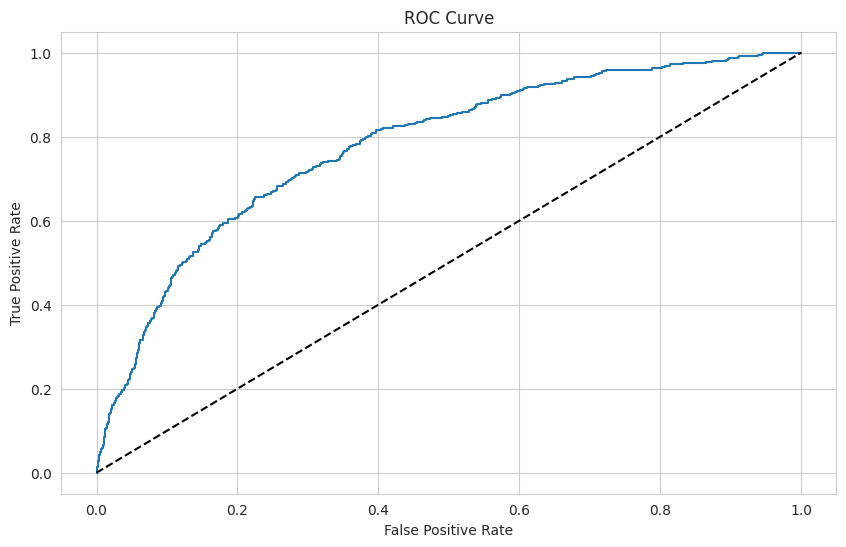

AUC Score:  0.7789093834068824


In [134]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score

# Assume 'model' is your trained model, 'X_test' is your test features, and 'y_test' is your test labels.

# 1. If the model has a history attribute (like models trained with Keras), we can plot the change in metrics over epochs:
if hasattr(logreg, 'history'):
    plt.figure(figsize=(12, 4))
    plt.plot(model.history.history['loss'], label='Train Loss')
    plt.plot(model.history.history['val_loss'], label='Test Loss')
    plt.title('Loss over epochs')
    plt.legend()
    plt.show()

# 2. Make predictions and print the confusion matrix and classification report:
y_pred = logreg.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 3. Plot ROC curve and calculate AUC:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]  # get the probability of the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')  # dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC Score: ", auc_score)


# Final Model and Model Deployment

In [142]:
# instantiate the final model
tf.random.set_seed(42)

model = Sequential()

# input layer
model.add(Dense(88, activation="relu", input_dim=X_train.shape[1]))

# hidden layer
model.add(Dense(126, activation="relu"))
model.add(Dense(87, activation="relu"))
model.add(Dense(34, activation="relu"))
model.add(Dense(96, activation="relu"))
model.add(Dense(52, activation="relu"))

# output layer
model.add(Dense(1, activation="sigmoid"))

opt = Nadam(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])


In [143]:
# train model
model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=42,
    epochs=100,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/100
153/153 [==============================] - 7s 12ms/step - loss: 0.5989 - recall: 0.0756 - val_loss: 0.4869 - val_recall: 0.0000e+00
Epoch 2/100
153/153 [==============================] - 1s 8ms/step - loss: 0.4681 - recall: 7.5643e-04 - val_loss: 0.4324 - val_recall: 0.0062
Epoch 3/100
153/153 [==============================] - 1s 7ms/step - loss: 0.4304 - recall: 0.1210 - val_loss: 0.4082 - val_recall: 0.2733
Epoch 4/100
153/153 [==============================] - 1s 8ms/step - loss: 0.4072 - recall: 0.2882 - val_loss: 0.3895 - val_recall: 0.3540
Epoch 5/100
153/153 [==============================] - 1s 8ms/step - loss: 0.3853 - recall: 0.3873 - val_loss: 0.3763 - val_recall: 0.3571
Epoch 6/100
153/153 [==============================] - 1s 7ms/step - loss: 0.3681 - recall: 0.4327 - val_loss: 0.3617 - val_recall: 0.4130
Epoch 7/100
153/153 [==============================] - 1s 6ms/step - loss: 0.3550 - recall: 0.4523 - val_loss: 0.3550 - val_recall: 0.4068
Epoch 8/100
153/15

<Axes: >

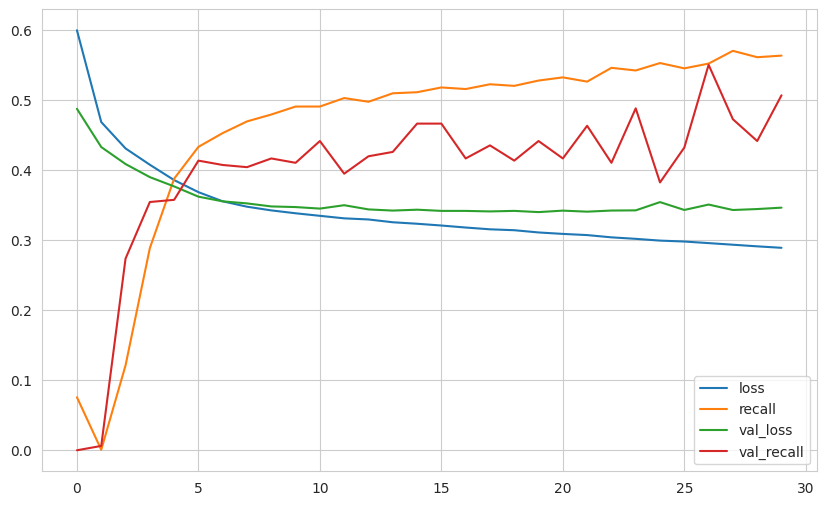

In [144]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [145]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3440086245536804
accuracy:  0.4910941421985626


In [146]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 3ms/step
[[1526   81]
 [ 200  193]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1607
           1       0.70      0.49      0.58       393

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [151]:
model.save("model_churn_prediction.h5")

## Prediction

In [153]:
from tensorflow.keras.models import load_model

In [154]:
model_churn = load_model("model_churn_prediction.h5")

In [148]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.000              1          1               1   
1       1  83807.860              1          0               1   
2       8 159660.800              3          1               0   
3       1      0.000              2          0               0   
4       2 125510.820              1          1               1   

   EstimatedSalary  Exited  
0       101348.880       1  
1       112542.580       0  
2       113931.570       1  
3        93826.630       0  
4        79084.100       0

In [149]:
single_customer_churn = df.drop("Exited", axis=1).iloc[0:1, :]
single_customer_churn

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   

   Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0       2    0.000              1          1               1       101348.880

In [161]:
df["Exited"].iloc[1:66].value_counts()

0    51
1    14
Name: Exited, dtype: int64

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___